# Notebook Walkthrough of Data Analysis

As an avid NBA stats/analytics fan, I fully ackowledge the amazing, in-depth work some of the industries best have done but I also acknowledge Basketball can't be analyzed in a vacuum like other sports (*cough baseball *cough).
So instead of training a basic Bayesian Regressor to predict wins at a 10% higher accuracy than NBA2K like every other Github NBA project, I wanted to do something that has never been done before. 

I think I've seen literally every possible stat be tracked into a database (including player position on court) so the aim of this project wasn't to generate some new advanced stats like FiveThirtyEight's RAPTOR or BBALL-Index's LEBRON metric... I just want to see if we can get more out of the basic stats, in particular salaries.

So to do this, I studied the following things to varying degrees of success:

<ol>
  <li><strong>Salary progression highlighting:</strong>
    <ol>
      <li>General trends</li>
      <li>Ranges</li>
    </ol>
  </li>
  <li><strong>Apply economic wealth disparity metrics to analyze team building trends (and if it helps win %) </strong>
    <ol>
      <li>Gini Coefficient</li>
      <li>Thiel Index Coefficient</li>
    </ol>
  </li>
  <li><strong>Analyze Championship Contender's to see if salary composition is relevant</strong>
    <ol>
      <li>NBA champs stats</li>
      <li>Conf. champ stats</li>
    </ol>
  </li>
  <li><strong>Lorenz curve modeling for win projections</strong>
    <ol>
      <li>Predicting interesting team salary structures</li>
      <li>Extracting trends</li>
    </ol>
  </li>
  <li><strong>Principal Component Analysis to see what players are worth investing in</strong>
    <ol>
      <li>Player clustering</li>
      <li>PCA vs. Win %</li>
    </ol>
  </li>
</ol>


<div style="text-align: left; font-size: 16px; color: #224CA0 ;">
    <strong> Code Architecture Note: </strong>
</div>
The following cells employ 1 main class for handling all data analysis. The supporting py file is ~1500 lines of code so the main purpose of this notebook is just to highlight the primary findings of the project

As usual, the first step before we begin anything is importing the packages and helper files.

In [1]:
import numpy as np
import seaborn as sns
sns.set_theme()

import Analytics_Helpers

<div style="text-align: left; font-size: 16px; color: #224CA0 ;">
    <strong> Database Reliability: </strong>
</div>
Since this SQL database is a combination of 2 websites with player name matching, there is bound to be some errors since str matching automation is not perfect. With that being said, I was able to get the average salary error for teams down to <strong>4.52%</strong>. Im happy with database accuracy on this level. <br>
However, the one assumption which is less than ideal is the fact that the Hoopshype API seemed to not work for any 2016 data. I couldn't automatically veryify any of the stats it was returning to me (even after reconstructing the query bot myself and debug the core functions) so I just didn't include this data. <br>
With that being said, I think I can confidiently say the trends extracted from this project make sense and the assumptions/approximations in the SQL db are within acceptable range. <br>
I added a convenient helpers function to extract the average salary error (in % difference) since the results come across a spectrum and I needed a way to verify the outlier findings were't statistical artifacts of the database concatenation phase.

Mean % error: 4.52%


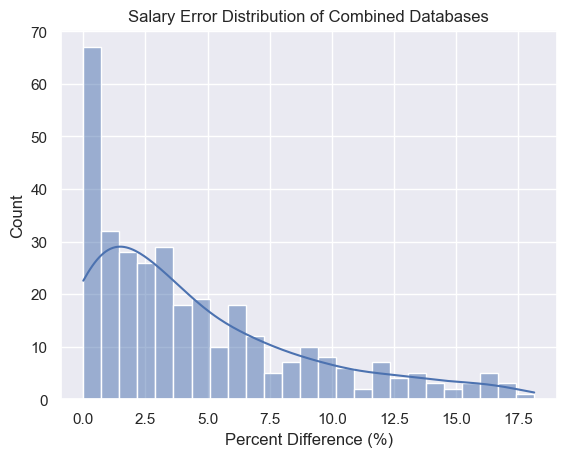

In [2]:
#Initialize Helper Function
NBA_Functions = Analytics_Helpers.Data_Interfacer('NBA_stats.db')

#Print % of team salaries
df_diff = NBA_Functions.get_db_error(plot=True)

<div style="text-align: left; font-size: 22px; color: #030c5c ;">
    <strong> 1- Salary Progression </strong>
</div>

As seen below, the salary distribution across the years has actually INCREASED. This is likely a result of teams willingness to pay luxury taxes (*cough* GSW *cough*) thanks to generous owners. With that being said, this trend is likely to change with the 1st/2nd curtain of the new CBA coming into effect soon. This will likely flatten out the top end of the salary distributions while also raising the floor (since you HAVE to spend close to the cap under the new CBA). 

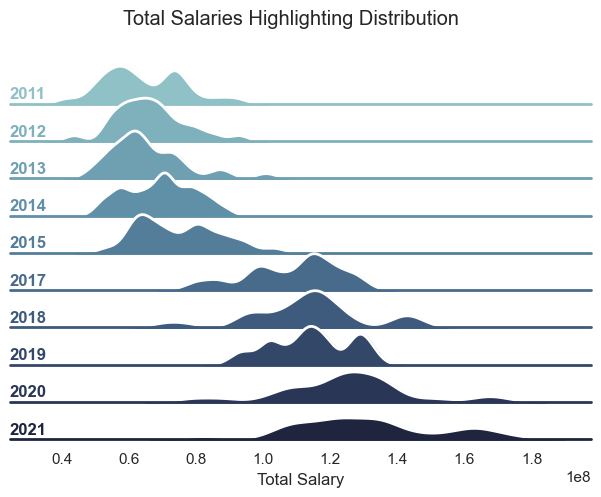

In [3]:
r = NBA_Functions.visualize_salary_progression(save=False)

I find this interesting because I think it will mean tanking teams give out massive overpays to players just to meet the salary floor. <br>
IMO this means 
<strong>Dillon Brooks may get over 40 mil/year at some point </strong> <br>
Although this CBA policy isn't perfect, I do believe it was necessary to make tanking harder to perform/hide. As seen below,<strong> the bottom end of team salary spending has actually GOTTEN LOWER over the past few years! OKC salary went down over the past few years! </strong>

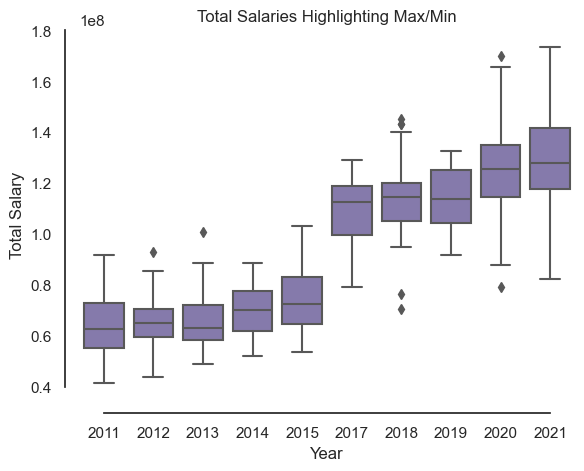

In [4]:
r2 = NBA_Functions.visualize_salary_distribution(r,save=False)

<div style="text-align: left; font-size: 16px; color: #224CA0 ;">
    <strong> Key Takeaways (Section 1) </strong>
</div>

- Average team salary is increasing, but range is also increasing
- New CBA will shrink this range and likely result in tanking teams overpaying players to meet salary floor
- Top spending teams has a distinct advantage in the recent years due to manipulation of luxury tax cutoff (GSW dynasty era)


<div style="text-align: left; font-size: 22px; color: #030c5c ;">
    <strong> 2- Economic theory applied to team salaries </strong>
</div>
<br>

<div style="text-align: left; font-size: 14px; color: black ;">
    <strong>What is the Gini coefficient? </strong>
</div>
The Gini coefficient is essentially a measure of wealth disparity in a country. Interestingly though, the math behind this metric lends itself well to basketball since each team has the same population and a relatively similar wealth distribution. <br>
The higher the Gini (closer to 1), the larger a salary disparity there is between top end and bottom end<br>


<br>
<div style="text-align: left; font-size: 14px; color: black ;">
    <strong>What is the Thiel Index? </strong>
</div>
The Thiel Index serves the same purpose as the Gini coefficient but is calculated in a different way, As a result, the index has 2 main metrics. The thiel_T (top end) index which is sensitive to changes in high end salary distributions and thiel_L (bottom end) index which is sensitive to change in low end salary distributions.
Since there is a pretty big range of Gini coefficients and thus Thiel indexes in the past 10 years, it will be easy to draw trends related to high/low salary distributbions.

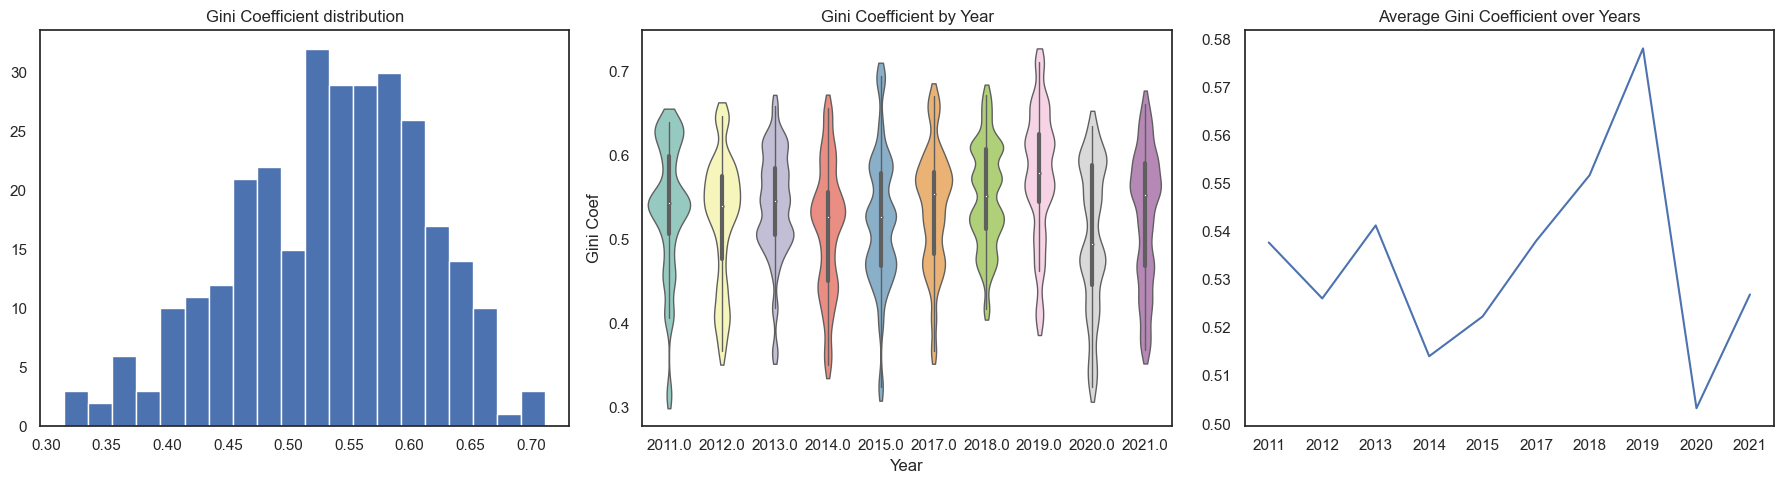

In [5]:
# Calculate Gini distributions of every team
_ = NBA_Functions.gini_distribution(plot=False)

#Calculate annual averages
_ = NBA_Functions.calculate_gini_avg()

#Plot the results
NBA_Functions.gini_dist_summary(save=True)

The figure above essentially tells us Gini coefficient ranges dramatically with no clear trends when plotted over years. <br>

<strong> But what about Gini/Thiel coefficients correlation to regular season win %? </strong>

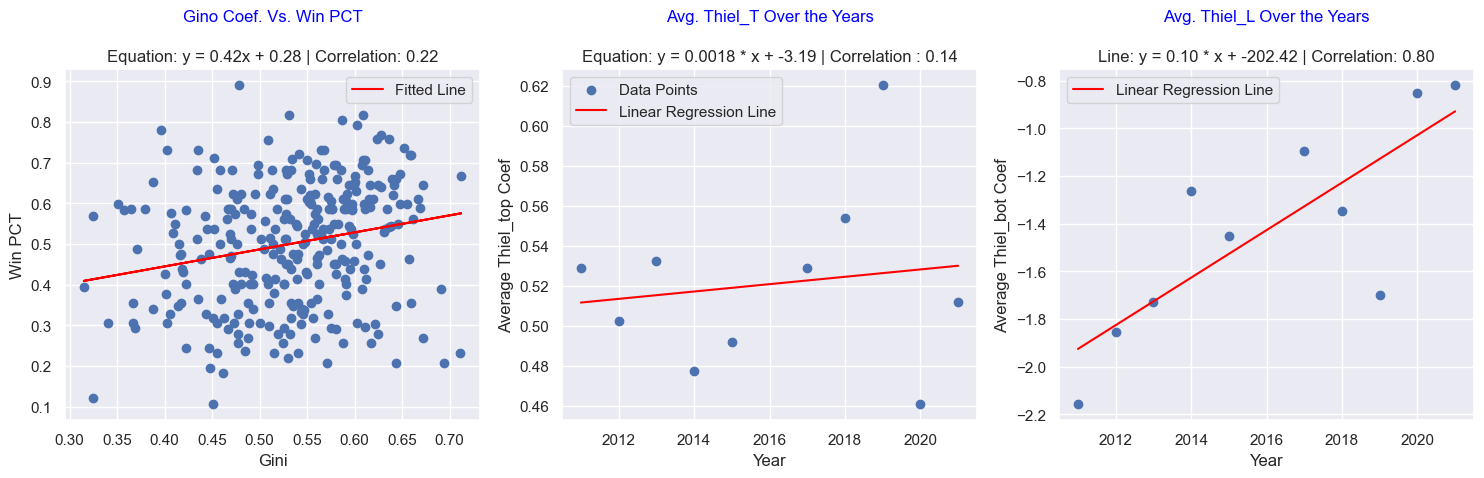

In [6]:
merged_df2 = NBA_Functions.generate_wins_gini()
df_thiel2,full_df = NBA_Functions.generate_thiel_df()
NBA_Functions.plot_thiels(save=True)

<div style="text-align: left; font-size: 14px; color: black ;">
    <strong> Gini Vs. Win % </strong>
</div>
Interestingly enough, <strong>there is actually a pearson correlation between Gini Coefficient and Win %</strong> (1= stronger correlation, 0 = weaker correlation). Albeit, the correlation is weak (0.22), this is still significant considering the noise/volatility that comes with any given team. For example, the GSW Gini coefficient has been pretty consistent, however in the 2019-2020, the GSW went 15-50 because of injuries. Considering how possible these injuried influenced outcomes are, the 0.22 correlation is noteworthy in my opinion (and professional analysts opinions as well <a href="https://mau-zachrisson.medium.com/the-sports-gini-evaluating-whether-stars-matter-more-in-the-playoffs-9779f86b8cbb">Medium Article</a>)<br>


<br>


<div style="text-align: left; font-size: 14px; color: black ;">
    <strong> Thiel Vs. Win % </strong>
</div>
There is also a weak positive correlation to Thiel_t (top) which basically suggests the top earners of every team is getting a larger proportion of team salary as time increases...no surprise.
What is a bit of a surprise is the fact that the strongest correlation is found with Thiel_L (bot). <strong>This tells us the minimum contract players in the league are starting to see disproportionate increases in wealth disparity too...<strong>


<div style="text-align: left; font-size: 16px; color: #224CA0 ;">
    <strong> Key Takeaways (Section 2) </strong>
</div>

- Pay your top players more and bottom players less to improve win % (sadly)
- Strong correlation between years and Thiel_L (bot) index...suggesting disparity in wealth is increasing among NBA minimum contract players
- Gino coef. varies widely across teams in any given season

<div style="text-align: left; font-size: 22px; color: #030c5c ;">
    <strong> 3- Economic theory applied to contending teams </strong>
</div>
<br>

The first plot shows us that with the exception of 1 team, the Gini coef of championship teams has been constantly increasing over the years (bubble championship excluded). The bubble probably is an outlier because of the abnormal rest period players experienced before attending a shortened bubble playoff series which favored seasoned, older players (Lebron). If we remove the bubble datapoint, we see very strong correlations (0.5-0.7) which suggests if you want to win a championship or even make it  to the finals, you should probably heavily invest in your top end talent. 

For reference, I also highlighted championship teams using the same scatter plot visual in the last section just to show that context is very important when analyzing these types of stats.

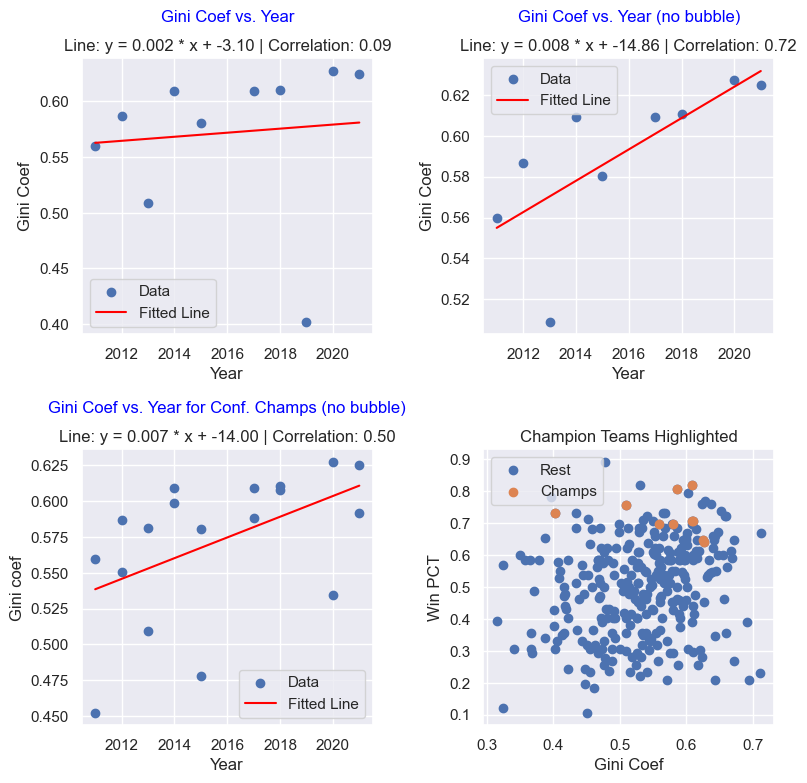

In [7]:
c1 = NBA_Functions.champion_filter(save=True)

I also provide the pearson correlation of various metrics so that you can see they are relatively correlated but each metric provides its own insight to high qualitty teams. 

In [8]:
c1.corr()

C:\Users\Zach\AppData\Local\Temp\ipykernel_16352\2015076472.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c1.corr()


,Year,Win PCT,Gini Coef,Thiel_top Coef,Thiel_bot Coef
Year,1.000000,-0.417298,0.497451,0.520615,0.074369
Win PCT,-0.417298,1.000000,-0.458551,-0.431424,-0.295873
Gini Coef,0.497451,-0.458551,1.000000,0.991822,-0.437830
Thiel_top Coef,0.520615,-0.431424,0.991822,1.000000,-0.428766
Thiel_bot Coef,0.074369,-0.295873,-0.437830,-0.428766,1.000000


<div style="text-align: left; font-size: 16px; color: #224CA0 ;">
    <strong> Key Takeaways (Section 3) </strong>
</div>

- Championship/Finals teams have strong correlations to high Gini coef. and this trend is only increasing as time progresses.
- Thiel_L (bot) (which has never been applied to NBA stats ever) suggests low earning NBA player salaries are seeing an increasing disparity
- The bubble championship is a significant outlier when it comes to Gini coef. theory.

<div style="text-align: left; font-size: 22px; color: #030c5c ;">
    <strong> 4- Lorenz curve modeling </strong>
</div>
<br>

<div style="text-align: left; font-size: 14px; color: black ;">
    <strong> What is the Lorenz Curve? </strong>
</div>
This curve is the cumulative wealth of a given population ordered from lowest earner to highest earner. This suggests that the steeper the exponential, the greater the wealth disparity in a population.

Since the NBA has large wealth disparity, we are able to fit exponential curves [ a1*e^(a2*x) ] to it quite well (>0.995 R-square scores). An example of this curve fit is provided below.

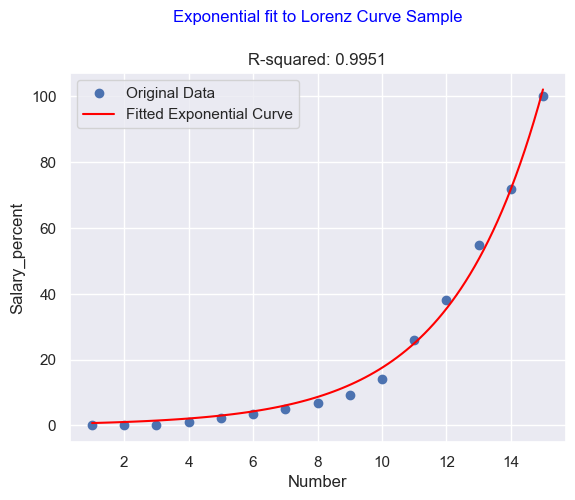

In [9]:
NBA_Functions.fit_curve_ex()

If we plot the average lorenz curve by year (earlier years = more red, later years = more blue), we can see theres actually a clear shift towards steeper lorenz curves as time progresses. What this suggests is the top earners are earner a bigger proportion of team salary caps as time goes on. I've heard many analysts claim this so this is no surprise. <strong> I just did this because I have yet to hear any analyst back up these types of claims with statistics </strong>

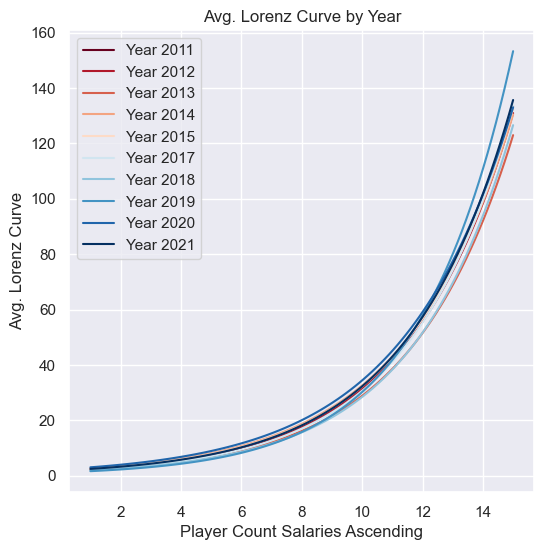

In [10]:
import matplotlib.cm as cm
sns.set_theme()
z1 = NBA_Functions.lorenz_curve_visual(save=True)

If should be noted that the lorenz curve/Gini coef. trends are changing every year in a predictable way. If we simply try to use historic data to predict win %, it is not accurate as seen below.

PHX 2023-2024 Projected Wins: 45


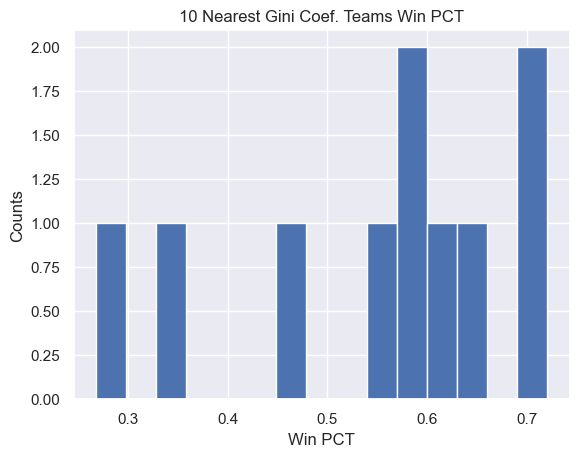

In [11]:
NBA_Functions.predict_wins('PHX',[47649433.0, 46741590.0, 36016200.0, 32459438.0, 3196448.0, 2815937.0, 2528233.0, 2346614.0, 2346614.0, 2346614.0, 2346614.0, 2165000.0, 1927896.0, 1927896.0, 1119563.0, 559782.0, 559782.0])

BKN 2023-2024 Projected Wins: 49


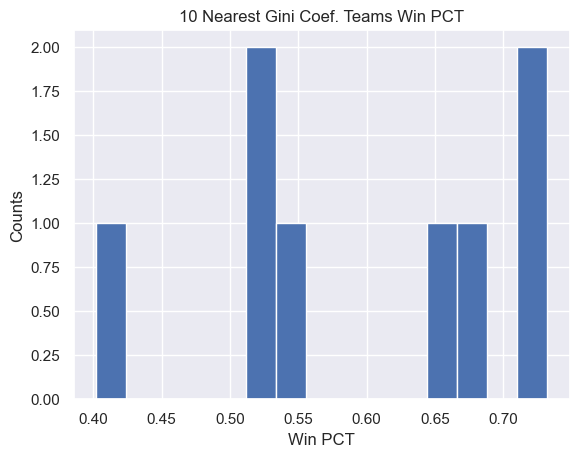

In [12]:
NBA_Functions.predict_wins('BKN',np.array([37893408.0, 25679348.0, 21700000.0, 20357143.0, 13932008.0, 9625000.0, 9500000.0, 3089460.0, 2966040.0, 2528233.0, 2346614.0, 2240160.0, 2210040.0, 2165000.0, 2019706.0, 559782.0, 559782.0]))

BKN (no ben simmons) 2023-2024 Projected Wins: 40


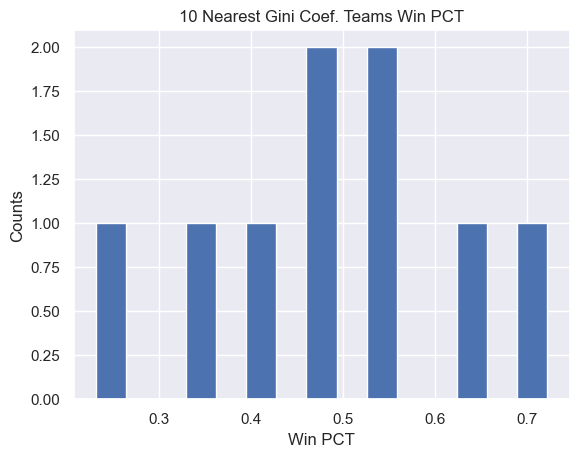

In [13]:
NBA_Functions.predict_wins('BKN (no ben simmons)',np.array([25679348.0, 21700000.0, 20357143.0, 13932008.0, 9625000.0, 9500000.0, 3089460.0, 2966040.0, 2528233.0, 2346614.0, 2240160.0, 2210040.0, 2165000.0, 2019706.0, 559782.0, 559782.0]))

<div style="text-align: left; font-size: 16px; color: #224CA0 ;">
    <strong> Key Takeaways (Section 4) </strong>
</div>

- Lorenz curve averaging suggests teams are paying their top talent a bigger portion of the pie. Not big news but this is the first statistical evidence I've seen of this claim.
- Lorenz curve/Gini Coef is not a good win projection if we do not consider year the team played. perhaps Gini coef rank would be a good metric for win projection based on year.

<div style="text-align: left; font-size: 22px; color: #030c5c ;">
    <strong> 5- Principal Component Analysis of High Gini Coef.Teams </strong>
</div>
<br>

<div style="text-align: left; font-size: 14px; color: black ;">
    <strong> What is Principal Component Analysis? </strong>
</div>
PCA is essentially a means to reduce the dimensionality of a stats. For example, if you want to compare 2 stats it can easily be done with a x-y plot. But what about 17 stats? PCA lets you combine the 17 stats into 1 or 2 linearly averaged variables, sort of similar to other basketball all-in-one stats. 

The PCA performed below is done on 17 unique player season stats (GP, min, pts, OREB,DREB, etc.)

I did this study just to see if there was a specific player archetype that is worth investing in. What you are seeing below are the highest Gini coef. teams (largest salary disparity) plotted on 2 arbitary scales. Interestingly enough, we can clearly see low win % teams  plot in the upper region and bottom left region whereas top performing teams plot in the bottom right region. 

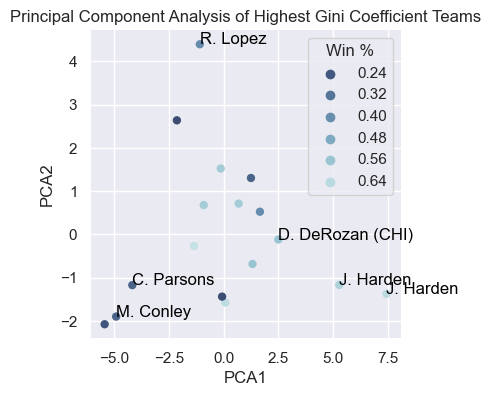

In [14]:
NBA_Functions.PCA_mapping(save=True)

If we combine all the player stats into a single variable on the x-axis, the correlation between top paid player stats for a given team and the teams win % becomes clear. <strong> If you're going to invest heavily in your top end talent, to win a bunch of games, you should have high clutch, high scoring primary/secondary options... and not a passing/rebounding player.

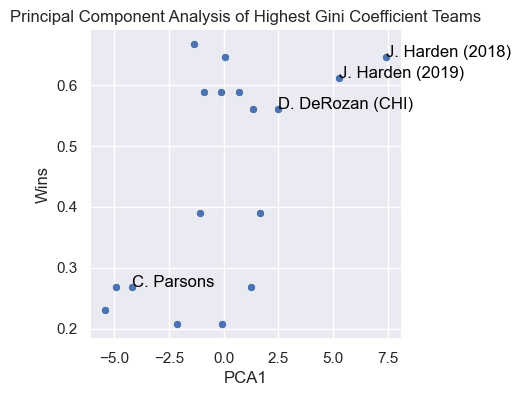

In [15]:
NBA_Functions.PCA_win_mapping(save=True)

<div style="text-align: left; font-size: 16px; color: #224CA0 ;">
    <strong> Key Takeaways (Section 5) </strong>
</div>

- Heliocentric players or clutch, playmaking scorers are the best investments a team can make if they go down the path of high Gini coef. team building.

<div style="text-align: left; font-size: 22px; color: #030c5c ;">
    <strong> Final Remarks </strong>
</div>
<br>

<div style="text-align: left; font-size: 14px; color: black ;">
    <strong> Gini Coefficient Vs. Win % </strong>
</div>
Theres a correlation between higher Gini coefs. and higher win %. This means teams should probably start acquiring that third superstar or trade for the disgruntled star in the offseason. <br>

<br>

<div style="text-align: left; font-size: 14px; color: black ;">
    <strong> Gini Coefficient of teams that make it to the finals </strong>
</div>
As time progresses, the teams that make it to the finals (with the exception of the bubble year) have had increasingly higher Gini coefficients, meaning that among the contending teams, the team with the higher investment in their highest paid atheletes usually win. <br>

<br>

<div style="text-align: left; font-size: 14px; color: black ;">
    <strong> Type of players worth investing in </strong>
</div>
For the highest Gini coef. teams, it is highly advisable to invest in clutch scorers rather than good passers or lower scoring max contract guys.